In [1]:
import math, datetime, time, random
import numpy as np
import pandas as pd

import re


def load_data(data_path):
  data = pd.read_csv(data_path)  
  return data

inbound = load_data("inbound_loads.csv")
outbound = load_data("outbound_laods.csv")
weather = load_data("weather.csv")
#For loop to ensure that all pallet data is in the same dataframe
pallet = load_data("Pallet_history_Gold_Spike[0].csv")
for x in range(1, 10):
    pallet = pd.concat([pallet, load_data(f"Pallet_history_Gold_Spike[{x}].csv")])
    print(len(pallet))
trainentest = load_data("demand_kWtrain_val.csv")




1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
4925535


In [3]:
import math, datetime, time, random
# for data visualization
import matplotlib.pyplot as plt
import missingno


In [8]:
##Visualizing features

#for categorical features (work_type, move category)
pallet["to_location_code"].value_counts().head(50)

#plt.hist(pallet["tran_type"])


FORK020888    10876
CFORK17103     9776
CFORK15449     2567
FORK006905     2539
FORK024518     2293
FORK005360     1978
FORK028825     1978
FORK014507     1836
FORK014701     1568
FORK006836     1455
FORK014706     1202
FORK014704      915
INVERTER05      807
INVERTER15      803
DR022           661
FORK029017      655
FORK006835      644
0150010991      623
DR023           616
DR035           608
FORK014705      608
INVERTER04      565
DR039           519
INVERTER03      513
INVENTORY1      508
WRAPMCHN05      474
DR036           466
CFORK05600      466
WRAPMCHN04      464
DR037           458
DR038           448
015003004F      431
DR024           412
DR040           404
CFORK06126      397
DR034           383
DR019           356
DR041           355
0150030831      351
CFORK05601      346
SPJ0024348      327
0020100011      310
DR052           294
015001004F      287
DR021           286
CFORK05599      255
FORK005361      252
DR020           251
DR068           245
0050310141      234


<Axes: >

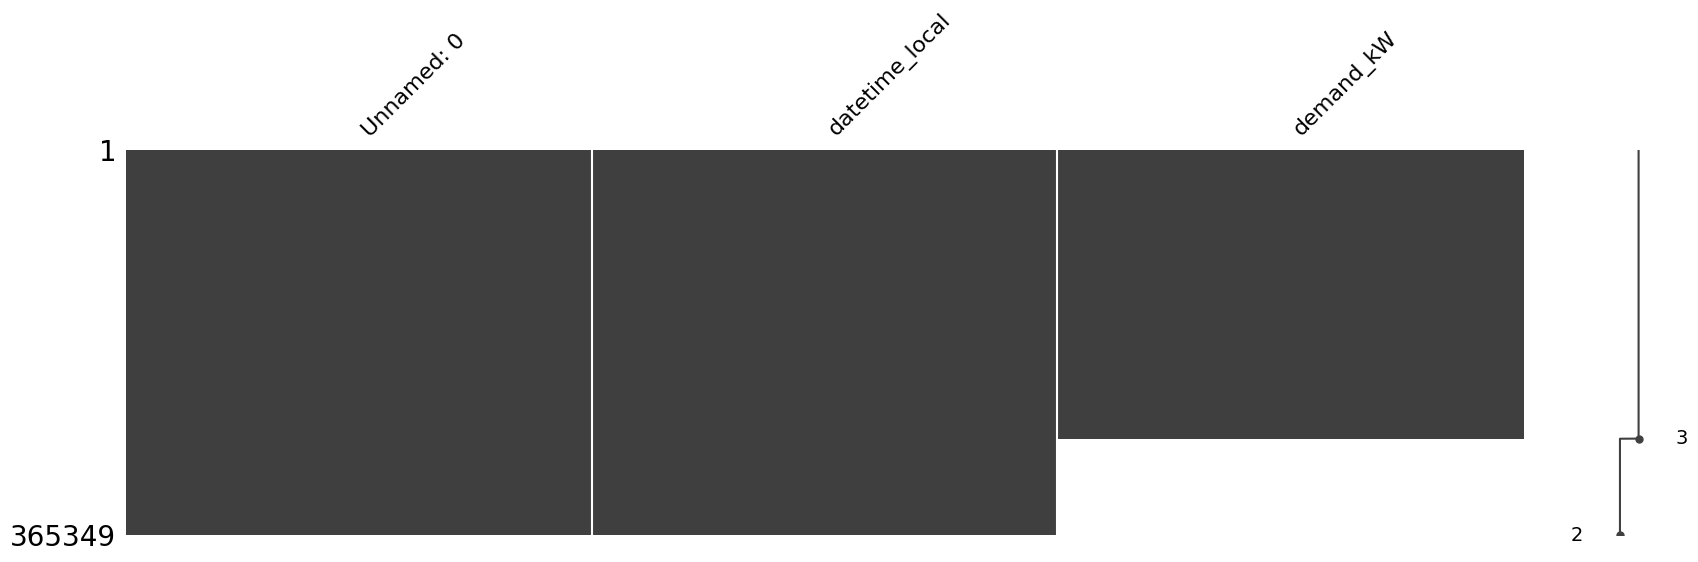

In [10]:
##Visualize Missing Values
missingno.matrix(trainentest, figsize = [20,5])
